In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [2]:
df = yf.download('^NSEI', '2000-01-01', '2021-06-16')
df = df.dropna()
df = df.iloc[:,:4]
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2021-06-09,15766.299805,15800.450195,15566.900391,15635.349609
2021-06-10,15692.099609,15751.250000,15648.500000,15737.750000
2021-06-11,15796.450195,15835.549805,15749.799805,15799.349609


In [3]:
#define predictor/independent variables
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod = 10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Date,,,,,,,,,
2007-10-12,5525.299805,5549.299805,5402.600098,5428.250000,5250.250049,0.883517,78.802620,0.449707,86.399902
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5315.155029,0.899851,83.961540,0.100098,-96.949707
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5375.064990,0.909270,83.741766,0.250000,242.299805
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5409.914990,0.892397,73.808245,-9.149902,-11.750000
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5424.150000,0.712693,58.931014,-8.199707,-107.799805
...,...,...,...,...,...,...,...,...,...
2021-06-09,15766.299805,15800.450195,15566.900391,15635.349609,15599.504883,0.880229,66.902092,26.200195,-7.600586
2021-06-10,15692.099609,15751.250000,15648.500000,15737.750000,15639.494922,0.848390,70.989050,56.750000,-74.200195
2021-06-11,15796.450195,15835.549805,15749.799805,15799.349609,15675.864844,0.835057,73.200890,58.700195,104.350586


In [4]:
#define target/dependent variable
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

In [5]:
#split the dataset into training and testing
split = int(0.7*len(df))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [6]:
#initiating logistic regression in python
model = LogisticRegression()
model = model.fit(X_train, Y_train)

In [7]:
#examine the co-efficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.0019929859413900033]
1,High,[0.00037306604638290047]
2,Low,[0.000332349123914443]
3,Close,[0.0007575626293355671]
4,S_10,[0.000529085848604158]
5,Corr,[1.8830512166709286e-05]
6,RSI,[0.0012579749412958648]
7,Open-Close,[0.0031195557100685547]
8,Open-Open,[0.00025625659495051063]


In [8]:
#calculating the class probablities
probability = model.predict_proba(X_train)
print(probability)

[[0.53326211 0.46673789]
 [0.4275948  0.5724052 ]
 [0.50297588 0.49702412]
 ...
 [0.46215285 0.53784715]
 [0.46119535 0.53880465]
 [0.48586831 0.51413169]]


In [9]:
#predict the class labels
predicted = model.predict(X_test)
# print(predicted)

In [10]:
# evaluating the model
# Confusion matrix - describe the performance of a classification model on a set of test dataset for which the true values are know
print(metrics.confusion_matrix(Y_test, predicted))

# another method to examine the performace of a classification model is
print(metrics.classification_report(Y_test, predicted))
# f1 score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class

[[152 296]
 [157 397]]
              precision    recall  f1-score   support

          -1       0.49      0.34      0.40       448
           1       0.57      0.72      0.64       554

    accuracy                           0.55      1002
   macro avg       0.53      0.53      0.52      1002
weighted avg       0.54      0.55      0.53      1002



In [21]:
# Model Accuracy
print(model.score(X_test, Y_test))

0.5479041916167665


In [22]:
# Cross validation - cross checking the accuracy of the model using 10=fold-cross validation
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

C:\Users\SHABEEH AP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.56287425 0.49401198 0.51197605 0.52095808 0.53592814 0.53892216
 0.52694611 0.53293413 0.49101796 0.51351351]
0.5229082375788963


<ipython-input-23-7fe1169ee3a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-23-7fe1169ee3a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nifty_Returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-23-7fe1169ee3a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

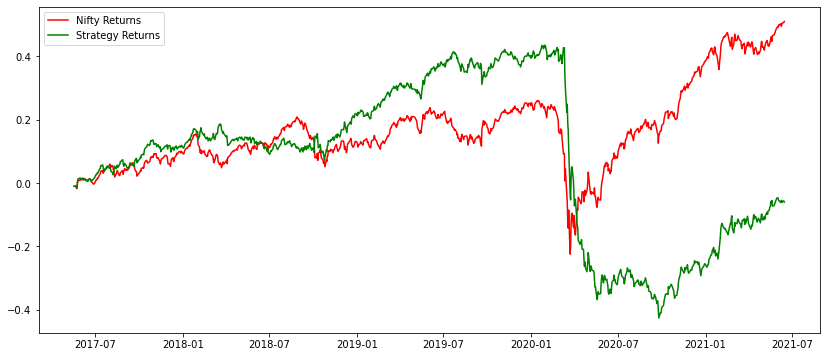

In [23]:
#trading strategy using the tool
df['Predicted_Signal'] = model.predict(X)
df['Nifty_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_Returns = np.cumsum(df[split:]['Nifty_Returns'])

df['Strategy_Returns'] = df['Nifty_Returns']*df['Predicted_Signal'].shift(1)
Cumulative_Strategy_Returns = np.cumsum(df[split:]['Strategy_Returns'])

plt.figure(figsize=(14,6))
plt.plot(Cumulative_Nifty_Returns, color='r', label='Nifty Returns')
plt.plot(Cumulative_Strategy_Returns, color='g', label='Strategy Returns')
plt.legend()
plt.show()